In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
from torch.utils.data import DataLoader, Subset
import os
import random
from src.helper_functions import train_step, test_step, accuracy_fn, run_model
from src.few_shot_learning import set_seed, calculate_accuracy, load_cinic10, plot_confusion_matrix
from src.plots_functions import multiple_runs_with_uncertainty_band
set_seed(213)

In [2]:
# Define the CNN backbone
class CNNFewShot(nn.Module):
    def __init__(self, num_classes=10):
        super(CNNFewShot, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


In [3]:
# Train the CNN on few-shot data
def train_few_shot(model, train_dataloader, test_dataloader, epochs=10, lr=0.001, silent=False):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)
    
    return run_model(train_dataloader, test_dataloader, model, criterion, optimizer, device, epochs, silent=silent)

In [4]:
data_dir = "../../data"
train_dataloader = load_cinic10(data_dir, few_shot_per_class=100)
test_dataloader = load_cinic10(data_dir, few_shot_per_class=100, split="test")

In [5]:
metrics_list = []
for _ in range(5):
    model = CNNFewShot(num_classes=10)
    metrics, time = train_few_shot(model, train_dataloader, test_dataloader, epochs=30, lr=0.001)
    metrics_list.append(metrics)

Train loss: 2.25447 | Train accuracy: 14.88%
Test loss: 2.15937 | Test accuracy: 18.06%

Train loss: 2.07597 | Train accuracy: 21.92%
Test loss: 2.04677 | Test accuracy: 23.12%

Train loss: 1.95154 | Train accuracy: 27.78%
Test loss: 1.93322 | Test accuracy: 26.88%

Train loss: 1.82904 | Train accuracy: 31.85%
Test loss: 1.87934 | Test accuracy: 30.16%

Train loss: 1.72346 | Train accuracy: 37.20%
Test loss: 1.85402 | Test accuracy: 32.24%

Train loss: 1.63122 | Train accuracy: 39.38%
Test loss: 1.78915 | Test accuracy: 33.23%

Train loss: 1.54405 | Train accuracy: 42.66%
Test loss: 1.83286 | Test accuracy: 33.73%

Train loss: 1.38051 | Train accuracy: 49.11%
Test loss: 1.84377 | Test accuracy: 33.73%

Train loss: 1.23629 | Train accuracy: 56.15%
Test loss: 1.84367 | Test accuracy: 36.11%

Train loss: 1.03978 | Train accuracy: 62.10%
Test loss: 2.01006 | Test accuracy: 34.42%

Train loss: 0.85047 | Train accuracy: 69.15%
Test loss: 2.15220 | Test accuracy: 34.13%

Train loss: 0.62973 |

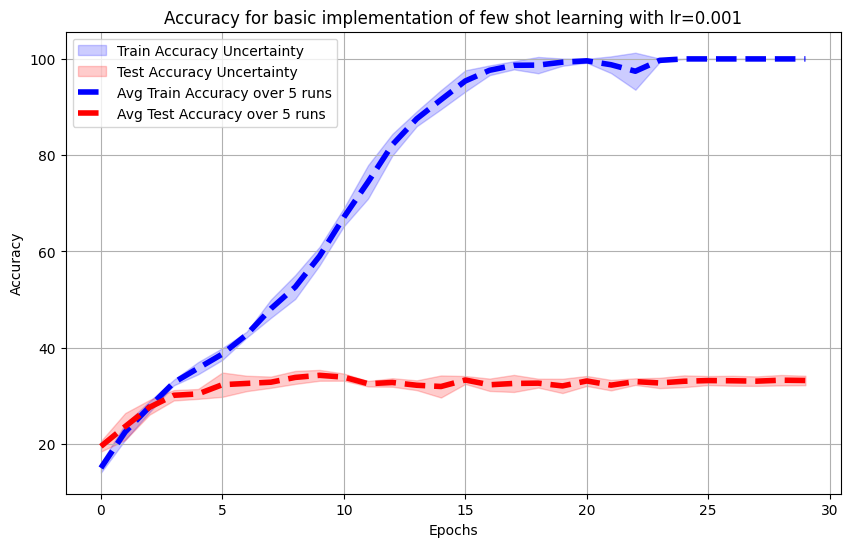

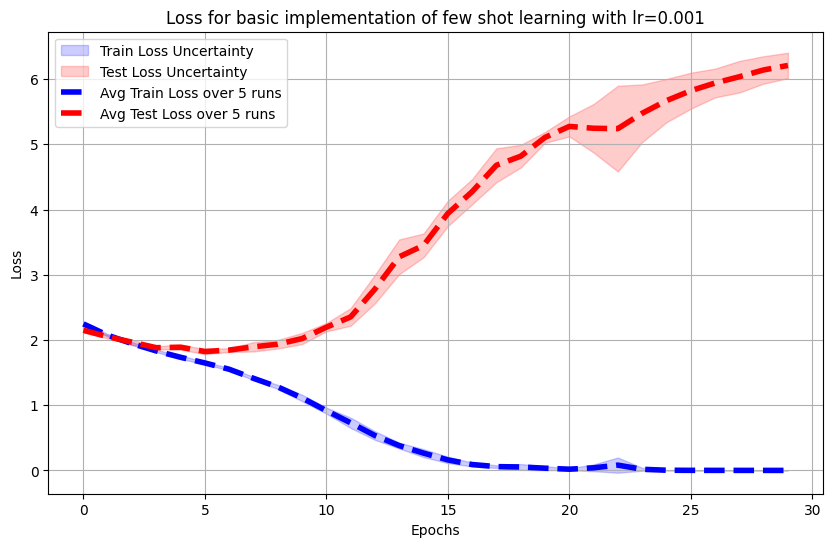

In [6]:
experiment_name = "basic implementation of few shot learning with lr=0.001"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")

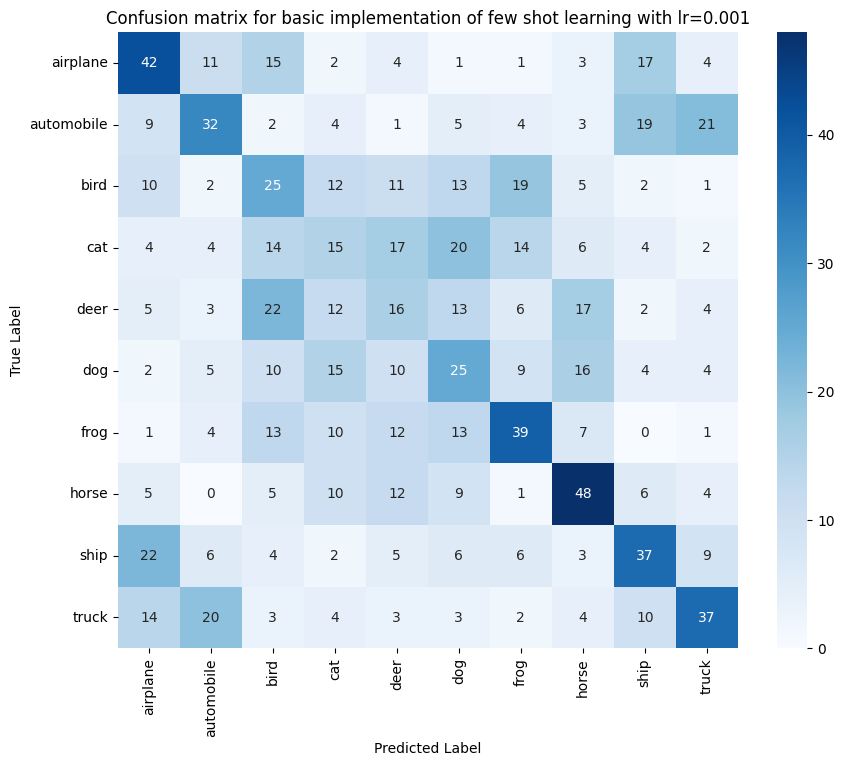

In [7]:
plot_confusion_matrix(model, test_dataloader, title=f"Confusion matrix for {experiment_name}")

In [8]:
metrics_list = []
for _ in range(5):
    model = CNNFewShot(num_classes=10)
    metrics, time = train_few_shot(model, train_dataloader, test_dataloader, epochs=20, lr=0.0001)
    metrics_list.append(metrics)

Train loss: 2.29730 | Train accuracy: 10.71%
Test loss: 2.27723 | Test accuracy: 15.18%

Train loss: 2.22083 | Train accuracy: 18.65%
Test loss: 2.14566 | Test accuracy: 21.92%

Train loss: 2.07472 | Train accuracy: 23.81%
Test loss: 2.08679 | Test accuracy: 24.80%

Train loss: 1.99349 | Train accuracy: 27.08%
Test loss: 2.03848 | Test accuracy: 25.30%

Train loss: 1.93144 | Train accuracy: 29.07%
Test loss: 2.03427 | Test accuracy: 23.51%

Train loss: 1.88639 | Train accuracy: 30.06%
Test loss: 1.97638 | Test accuracy: 29.56%

Train loss: 1.85100 | Train accuracy: 33.83%
Test loss: 1.97004 | Test accuracy: 28.47%

Train loss: 1.80603 | Train accuracy: 35.22%
Test loss: 1.92909 | Test accuracy: 29.46%

Train loss: 1.76402 | Train accuracy: 36.31%
Test loss: 1.90131 | Test accuracy: 32.34%

Train loss: 1.73029 | Train accuracy: 36.61%
Test loss: 1.88412 | Test accuracy: 31.35%

Train loss: 1.69985 | Train accuracy: 38.00%
Test loss: 1.91671 | Test accuracy: 30.95%

Train loss: 1.66869 |

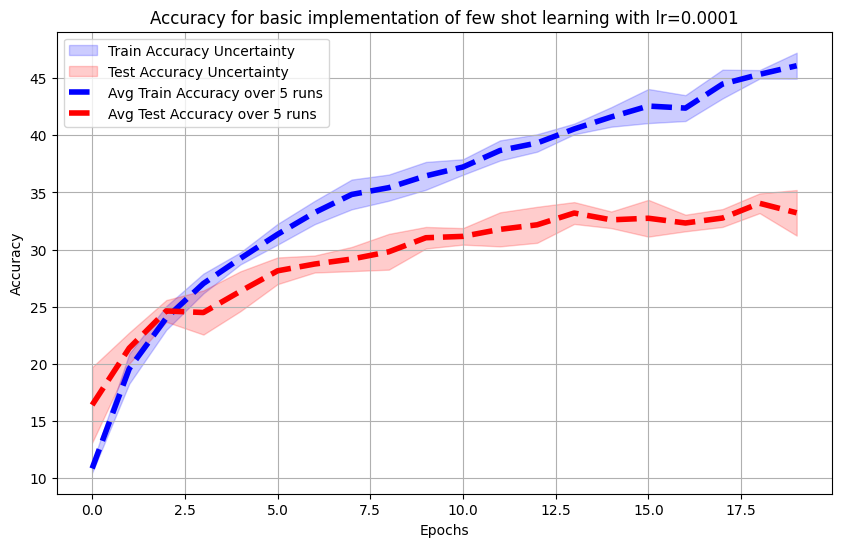

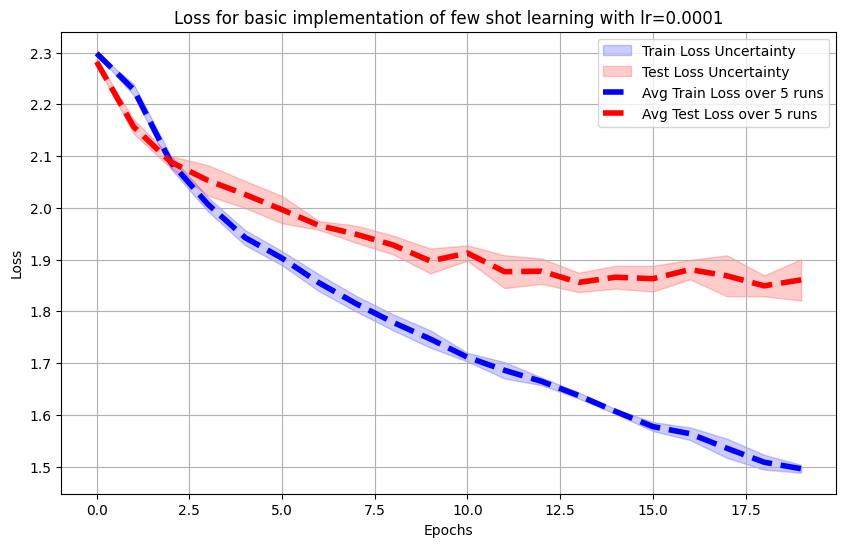

In [9]:
experiment_name = "basic implementation of few shot learning with lr=0.0001"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")

In [10]:
metrics_list = []
for _ in range(5):
    model = CNNFewShot(num_classes=10)
    metrics, time = train_few_shot(model, train_dataloader, test_dataloader, epochs=30, lr=0.0001)
    metrics_list.append(metrics)

Train loss: 2.29408 | Train accuracy: 12.00%
Test loss: 2.27672 | Test accuracy: 17.66%

Train loss: 2.22707 | Train accuracy: 19.74%
Test loss: 2.17753 | Test accuracy: 20.44%

Train loss: 2.10228 | Train accuracy: 23.81%
Test loss: 2.10955 | Test accuracy: 22.62%

Train loss: 2.00478 | Train accuracy: 25.50%
Test loss: 2.08477 | Test accuracy: 25.30%

Train loss: 1.96828 | Train accuracy: 29.46%
Test loss: 2.01080 | Test accuracy: 27.58%

Train loss: 1.88827 | Train accuracy: 31.65%
Test loss: 1.98907 | Test accuracy: 27.08%

Train loss: 1.85392 | Train accuracy: 32.84%
Test loss: 1.94922 | Test accuracy: 29.86%

Train loss: 1.81124 | Train accuracy: 33.43%
Test loss: 2.03100 | Test accuracy: 27.38%

Train loss: 1.78723 | Train accuracy: 34.92%
Test loss: 1.93994 | Test accuracy: 30.56%

Train loss: 1.75031 | Train accuracy: 35.81%
Test loss: 1.89395 | Test accuracy: 32.44%

Train loss: 1.71158 | Train accuracy: 37.20%
Test loss: 1.95053 | Test accuracy: 31.35%

Train loss: 1.68054 |

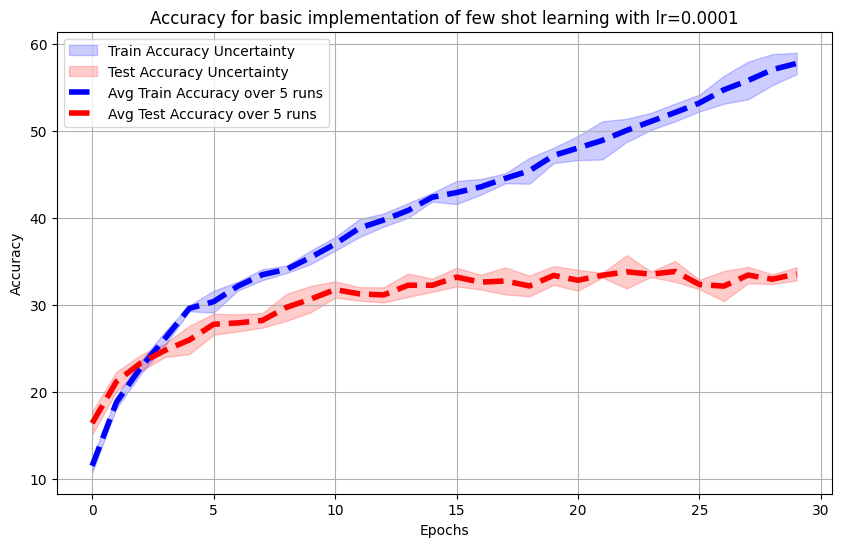

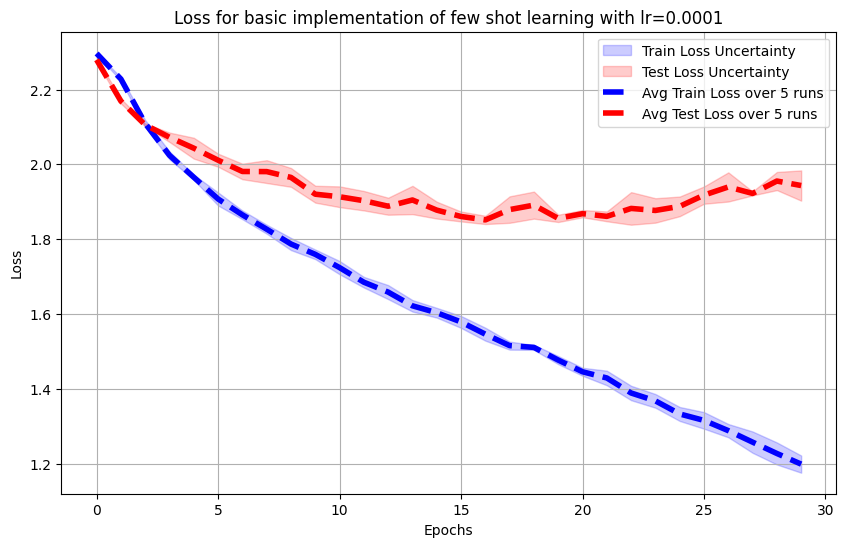

In [11]:
experiment_name = "basic implementation of few shot learning with lr=0.0001"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")

In [12]:
metrics_list = []
for _ in range(5):
    model = CNNFewShot(num_classes=10)
    metrics, time = train_few_shot(model, train_dataloader, test_dataloader, epochs=30, lr=0.01)
    metrics_list.append(metrics)

Train loss: 2.35385 | Train accuracy: 8.13%
Test loss: 2.30288 | Test accuracy: 9.92%

Train loss: 2.30661 | Train accuracy: 7.24%
Test loss: 2.30289 | Test accuracy: 9.92%

Train loss: 2.30557 | Train accuracy: 9.23%
Test loss: 2.30269 | Test accuracy: 10.02%

Train loss: 2.30569 | Train accuracy: 7.84%
Test loss: 2.30264 | Test accuracy: 10.02%

Train loss: 2.30574 | Train accuracy: 8.83%
Test loss: 2.30272 | Test accuracy: 9.92%

Train loss: 2.30496 | Train accuracy: 8.83%
Test loss: 2.30264 | Test accuracy: 9.92%

Train loss: 2.30607 | Train accuracy: 9.33%
Test loss: 2.30270 | Test accuracy: 10.02%

Train loss: 2.30525 | Train accuracy: 8.83%
Test loss: 2.30272 | Test accuracy: 9.92%

Train loss: 2.30456 | Train accuracy: 9.03%
Test loss: 2.30267 | Test accuracy: 10.02%

Train loss: 2.30580 | Train accuracy: 8.13%
Test loss: 2.30274 | Test accuracy: 10.02%

Train loss: 2.30513 | Train accuracy: 8.33%
Test loss: 2.30270 | Test accuracy: 10.02%

Train loss: 2.30533 | Train accuracy:

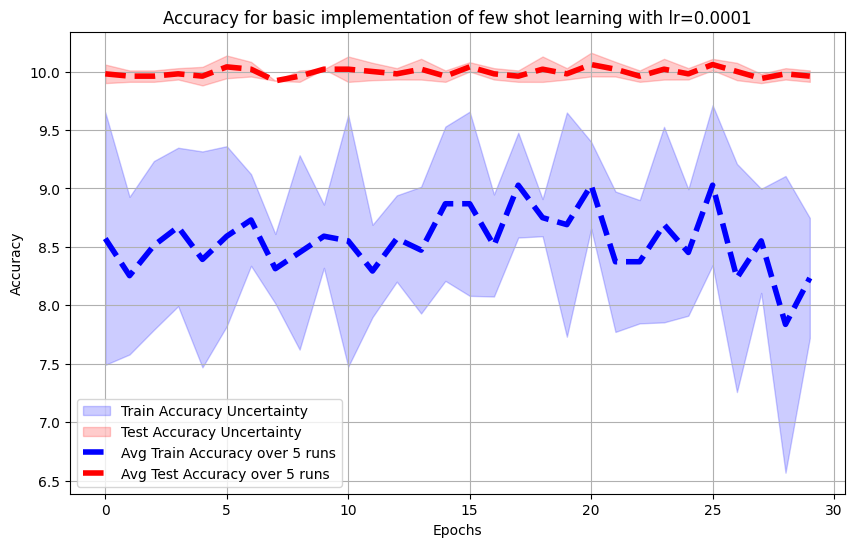

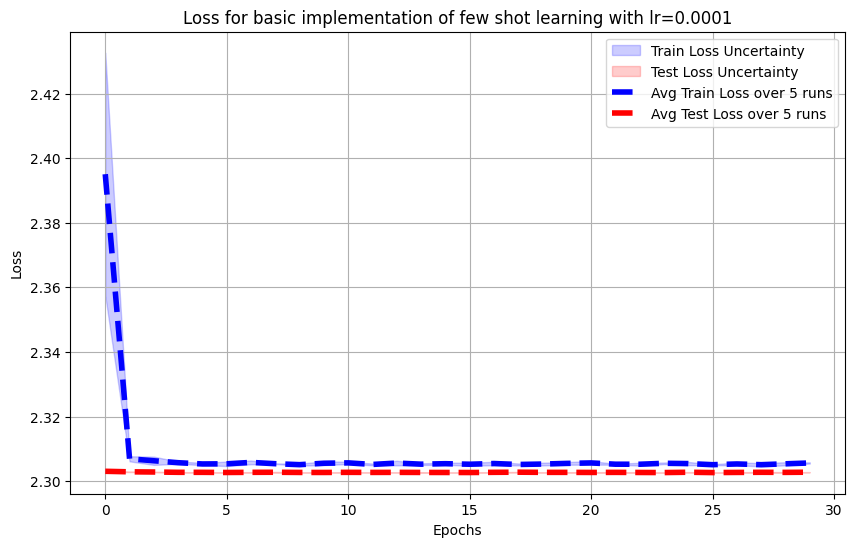

In [13]:
experiment_name = "basic implementation of few shot learning with lr=0.0001"
multiple_runs_with_uncertainty_band(metrics_list, f"Accuracy for {experiment_name}", f"Loss for {experiment_name}")